### A Kalman Filter without machine learning
##### This second example of machine learning free Kalman Filter takes in a noisy dataset and outputs predicted endstates. Remove the 'generate some noisy measurements' section and replace with your own data. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

class KalmanFilter:
    def __init__(self, initial_state, initial_covariance_matrix, A, H, Q, R):
        self.state = initial_state
        self.covariance_matrix = initial_covariance_matrix
        self.A = A
        self.H = H
        self.Q = Q
        self.R = R

    def predict(self):
        self.state = np.dot(self.A, self.state)
        self.covariance_matrix = np.dot(np.dot(self.A, self.covariance_matrix), self.A.T) + self.Q

    def update(self, measurement):
        innovation = measurement - np.dot(self.H, self.state)
        innovation_covariance = np.dot(np.dot(self.H, self.covariance_matrix), self.H.T) + self.R
        kalman_gain = np.dot(np.dot(self.covariance_matrix, self.H.T), np.linalg.inv(innovation_covariance))

        self.state = self.state + np.dot(kalman_gain, innovation)
        self.covariance_matrix = np.dot(np.eye(self.covariance_matrix.shape[0]) - np.dot(kalman_gain, self.H), self.covariance_matrix)

    def filter(self, measurements):
        filtered_states = []
        for measurement in measurements:
            self.predict()
            self.update(measurement)
            filtered_states.append(self.state)
        return filtered_states


In [5]:
# define the initial state and covariance matrix
initial_state = np.array([[0]])
initial_covariance_matrix = np.array([[1]])

# define the system model matrices
A = np.array([[1]])
H = np.array([[1]])

# define the process and measurement noise covariance matrices
Q = np.array([[0.1]])
R = np.array([[1]])

# create the Kalman filter object
kf = KalmanFilter(initial_state, initial_covariance_matrix, A, H, Q, R)

# generate some noisy measurements
measurements = [np.array([[i + np.random.normal(0, 1)]]) for i in range(10)]

# filter the measurements using the Kalman filter
filtered_states = kf.filter(measurements)

# print the filtered states
for i, state in enumerate(filtered_states):
    print(f"Step {i}: {state[0][0]}")


Step 0: 0.6298869432617685
Step 1: 0.5671362872854548
Step 2: 0.453971347081572
Step 3: 1.5250911120489687
Step 4: 1.8399620239105505
Step 5: 2.241069054082845
Step 6: 3.5928717667753194
Step 7: 4.377617796861328
Step 8: 5.382624229387465
Step 9: 5.933625256252293


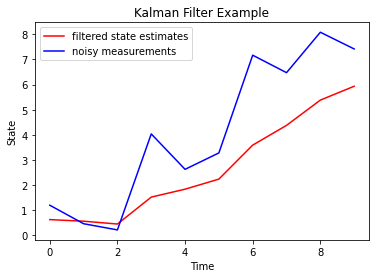

In [8]:
# plot the filtered states
filtered_states = np.array(filtered_states)
plt.plot(filtered_states[:, 0, 0], 'r-', label='filtered state estimates')
plt.plot([m[0, 0] for m in measurements], 'b-', label='noisy measurements')
plt.legend()
plt.xlabel('Time')
plt.ylabel('State')
plt.title('Kalman Filter Example')
plt.show()